# Working with Sequences

## Training

Before we focus our attention on text data, let’s first try this out with some continuous-valued synthetic data.

Here, our 1000 synthetic data will follow the trigonometric sin function, applied to 0.01 times the time step. To make the problem a little more interesting, we corrupt each sample with additive noise. From this sequence we extract training examples, each consisting of features and a label.

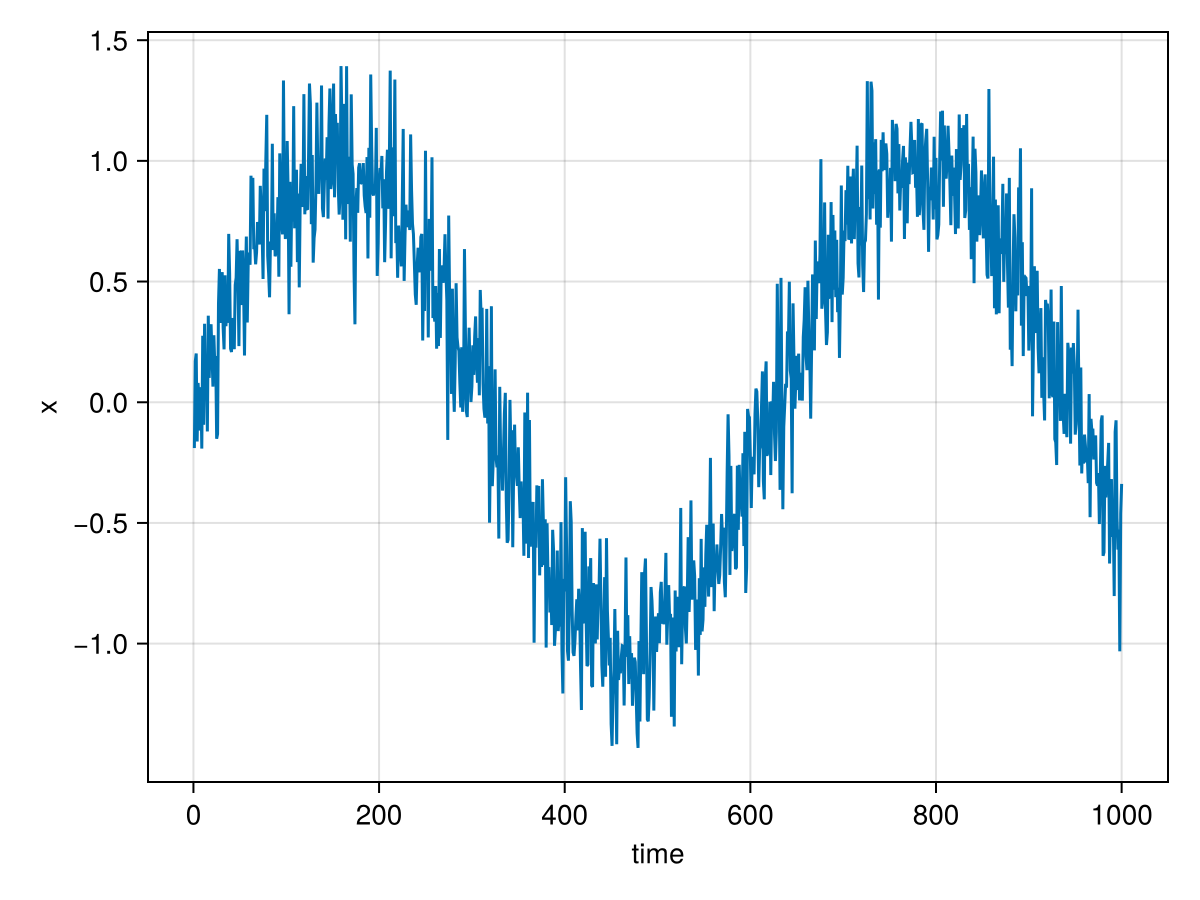

In [70]:
using CairoMakie

batch_size=16
T=1000
num_train=600
tau=4

time = 1:T
x = sin.(0.01time)+0.2randn(T)

fg,ax = lines(time, x; axis=(;yticks = -1:0.5:1.5,xticks = 0:200:1000,xlabel = "time",ylabel = "x"))

We create a data iterator on the first 600 examples, covering a period of the sin function.

In [170]:
using IterTools,Flux

data = hcat(map(x->collect(x),[partition(x,tau,1)...][begin:end-1])...)

features = data[:,1:num_train]
labels = x[tau+1:num_train+tau]


vals = data[:,num_train+1:end]
vals_labels = x[num_train+tau+1:end]

train_loader = Flux.DataLoader((features,labels),batchsize = batch_size)

38-element DataLoader(::Tuple{Matrix{Float64}, Vector{Float64}}, batchsize=16)
  with first element:
  (4×16 Matrix{Float64}, 16-element Vector{Float64},)

In this example our model will be a standard linear regression.

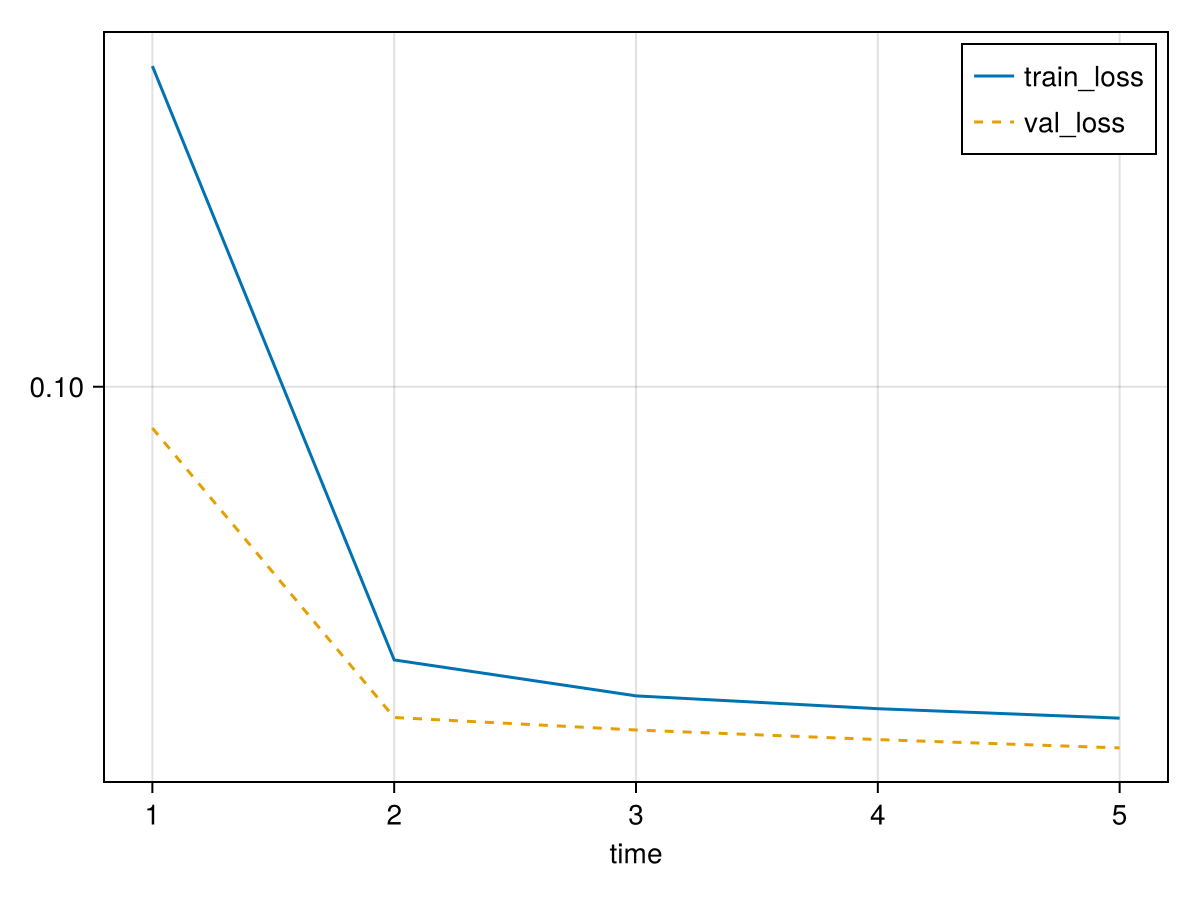

In [270]:
using MLUtils

model = Dense(4=>1)

loss(model,x,y) = Flux.mse(vec(model(x)),y)

train_loss = []
val_loss = []

for i in 1:5
    for data in train_loader
        Flux.train!(loss,model,[data],Descent(0.01))
    end
    push!(val_loss,loss(model,vals,vals_labels))
    push!(train_loss,loss(model,features,labels))
end

fg2,ax2 = lines(train_loss,label="train_loss"; axis=(;yticks = 0.05:0.05:0.3,xticks = 0:5,xlabel = "time",ylabel = ""))
lines!(ax2,val_loss,label="val_loss",linestyle=:dash)
axislegend(position = :rt)
fg2

## WIP